In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import sqlite3
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import tensorflow as tf
from sklearn.metrics import mean_absolute_error

In [2]:
database = "data.sqlite"

conn = sqlite3.connect(database)

train_df = pd.read_sql("select * from new_table_name", con=conn)
train_df.head()

,Unnamed: 0,year,make,model,final_price,mileage,engine,zipcode,engine string
0,1,1997,Chevrolet,Chevrolet Suburban,"$17,000",67000,5700.0,60069,5.7L Vortec V8
1,2,1990,Porsche,Porsche 964 911,"$225,000",1000,3800.0,84790,3.8-Liter Flat-Six
2,3,2003,Toyota,Toyota Pickup,"$24,750",116000,3400.0,90027,3.4-Liter DOHC V6
3,5,1992,Volkswagen,Volkswagen Golf/Rabbit Cabriolet,"$10,750",100000,1800.0,98208,1.8-Liter Inline-Four
4,6,2008,Toyota,Toyota FJ Cruiser,"$32,500",9000,4000.0,57108,4.0-Liter V6


In [3]:
conn.close()

In [4]:
train_df['final_price']=(train_df['final_price'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))

In [5]:
train_df = train_df.drop(['model', 'engine string', 'Unnamed: 0', 'zipcode'], axis='columns')
train_df

,year,make,final_price,mileage,engine
0,1997,Chevrolet,17000.0,67000,5700.0
1,1990,Porsche,225000.0,1000,3800.0
2,2003,Toyota,24750.0,116000,3400.0
3,1992,Volkswagen,10750.0,100000,1800.0
4,2008,Toyota,32500.0,9000,4000.0
...,...,...,...,...,...
7100,1983,Jeep,39962.0,24000,4200.0
7101,1997,Ford,24900.0,75000,7300.0
7102,1972,Honda,2400.0,5000,174.0
7103,2005,Ford,17750.0,22000,3900.0


In [6]:
train_df.value_counts()

year  make           final_price  mileage  engine  
1999  BMW            29250.0      82000    3200.000    2
2002  Ford           33500.0      14000    5400.000    2
2003  Chevrolet      30000.0      7000     5700.000    2
2008  BMW            31000.0      36000    4000.000    2
2009  Mercedes-Benz  28750.0      33000    6200.000    2
                                                      ..
1984  Jeep           35000.0      137000   4200.000    1
                     26000.0      139000   4200.000    1
                     25000.0      70000    4200.000    1
                     24250.0      42000    4981.648    1
2022  Porsche        307307.0     25000    4000.000    1
Length: 7100, dtype: int64

In [7]:
# Convert categorical data to numeric and separate target feature for training data
train_df1 = pd.get_dummies(train_df)
train_df1.head()

,year,final_price,mileage,engine,make_AMC,make_Acura,make_Alfa Romeo,make_Alpine,make_Amphicar,make_Ariel,...,make_Saab,make_Shelby,make_Studebaker,make_Subaru,make_Sunbeam,make_Toyota,make_Triumph,make_Volkswagen,make_Volvo,make_Willys
0,1997,17000.0,67000,5700.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1990,225000.0,1000,3800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2003,24750.0,116000,3400.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1992,10750.0,100000,1800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2008,32500.0,9000,4000.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
train_X = train_df1.drop(columns='final_price')
train_y = train_df1['final_price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, random_state=42)

In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
print(f'Model Score: {model.score(X_train_scaled, y_train)}')
print(f'Model Score: {model.score(X_test_scaled, y_test)}')

Model Score: 0.26766515342975683
Model Score: -1.8699450895005813e+23


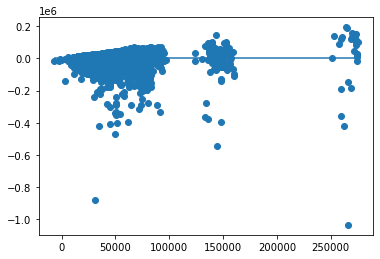

In [14]:
predictions = model.predict(X_train_scaled)
# Plot Residuals
plt.scatter(predictions, predictions - y_train)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [18]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
print(f"True output: {train_y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y_train[0]}")

x_min = X_train_scaled.min()
x_max = X_train_scaled.max()
y_min_actual = y_train.min()
y_max_actual = y_train.max()

y_min = 101.896225057 + (model.coef_ * x_min)
y_max = 101.896225057 + (model.coef_ * x_max)
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 71 is different from 1)

In [ ]:
reg = Lasso(max_iter=10000).fit(X_train_scaled, y_train)
print(f'Train score: {reg.score(X_train_scaled, y_train)}')
print(f'Test Score: {reg.score(X_test_scaled, y_test)}')

Train score: 0.26804787330373536
Test Score: 0.06990602541123325


In [ ]:
reg = Ridge(alpha=100).fit(X_train_scaled, y_train)
print(f'Train score: {reg.score(X_train_scaled, y_train)}')
print(f'Test Score: {reg.score(X_test_scaled, y_test)}')

Train score: 0.2679359935686625
Test Score: 0.07191953465417777


In [ ]:
reg = ElasticNet(alpha=10).fit(X_train_scaled, y_train)
print(f'Train score: {reg.score(X_train_scaled, y_train)}')
print(f'Test Score: {reg.score(X_test_scaled, y_test)}')

Train score: 0.08950727765164945
Test Score: 0.03896535884460828


In [ ]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()
    y_pred = reg.predict(X_test_scaled)
    print(mean_absolute_error(y_test, y_pred))    

In [ ]:
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [ ]:
test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)

Model: KNeighborsRegressor
Train score: 0.6052034645832656
Test Score: 0.23028774481921122

21344.75171637591
Model: RandomForestRegressor
Train score: 0.9077175539438057
Test Score: 0.42131359165946747

18334.223974636225
Model: ExtraTreesRegressor
Train score: 0.9932828423680392
Test Score: 0.44610491658436

18082.87561151754
Model: AdaBoostRegressor
Train score: -3.6476076729915494
Test Score: -2.553222051537058

111645.55040308763
Model: SVR
Train score: -0.08710783142007417
Test Score: -0.0732446822790187

29266.79350581873


In [ ]:
nn = tf.keras.models.Sequential()
# First hidden layer
nn.add(tf.keras.layers.Dense(units=729, activation="sigmoid", input_dim=71))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=486, activation="relu"))
nn.add(tf.keras.layers.Dense(units=324, activation="relu"))
nn.add(tf.keras.layers.Dense(units=216, activation="relu"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1))
# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 729)               52488     
                                                                 
 dense_11 (Dense)            (None, 486)               354780    
                                                                 
 dense_12 (Dense)            (None, 324)               157788    
                                                                 
 dense_13 (Dense)            (None, 216)               70200     
                                                                 
 dense_14 (Dense)            (None, 1)                 217       
                                                                 
Total params: 635,473
Trainable params: 635,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss="mse", optimizer="rmsprop", metrics=["mae"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100000)

Epoch 1/100000
167/167 [==============================] - 1s 5ms/step - loss: 5193209856.0000 - mae: 46290.5000
Epoch 2/100000
167/167 [==============================] - 1s 5ms/step - loss: 5190952448.0000 - mae: 46266.1562
Epoch 3/100000
167/167 [==============================] - 1s 4ms/step - loss: 5187587072.0000 - mae: 46229.9609
Epoch 4/100000
167/167 [==============================] - 1s 4ms/step - loss: 5184314368.0000 - mae: 46194.2422
Epoch 5/100000
167/167 [==============================] - 1s 4ms/step - loss: 5180999680.0000 - mae: 46158.8594
Epoch 6/100000
167/167 [==============================] - 1s 4ms/step - loss: 5177766400.0000 - mae: 46123.5039
Epoch 7/100000
167/167 [==============================] - 1s 4ms/step - loss: 5174479872.0000 - mae: 46088.2031
Epoch 8/100000
167/167 [==============================] - 1s 4ms/step - loss: 5171207680.0000 - mae: 46052.7852
Epoch 9/100000
167/167 [==============================] - 1s 4ms/step - loss: 5167950336.0000 - mae: 460

167/167 [==============================] - 1s 5ms/step - loss: 4964705280.0000 - mae: 43758.9492
Epoch 74/100000
167/167 [==============================] - 1s 5ms/step - loss: 4961620992.0000 - mae: 43723.8594
Epoch 75/100000
167/167 [==============================] - 1s 5ms/step - loss: 4958542336.0000 - mae: 43688.6797
Epoch 76/100000
167/167 [==============================] - 1s 5ms/step - loss: 4955428352.0000 - mae: 43653.4336
Epoch 77/100000
167/167 [==============================] - 1s 5ms/step - loss: 4952382976.0000 - mae: 43618.3242
Epoch 78/100000
167/167 [==============================] - 1s 5ms/step - loss: 4949272576.0000 - mae: 43583.0859
Epoch 79/100000
167/167 [==============================] - 1s 5ms/step - loss: 4946203648.0000 - mae: 43547.8555
Epoch 80/100000
167/167 [==============================] - 1s 5ms/step - loss: 4943136256.0000 - mae: 43512.6797
Epoch 81/100000
167/167 [==============================] - 1s 5ms/step - loss: 4940045312.0000 - mae: 43477.5352

167/167 [==============================] - 1s 5ms/step - loss: 4748844544.0000 - mae: 41248.6250
Epoch 146/100000
167/167 [==============================] - 1s 5ms/step - loss: 4745949184.0000 - mae: 41214.2773
Epoch 147/100000
167/167 [==============================] - 1s 5ms/step - loss: 4743048704.0000 - mae: 41179.8633
Epoch 148/100000
167/167 [==============================] - 1s 5ms/step - loss: 4740119040.0000 - mae: 41145.4961
Epoch 149/100000
167/167 [==============================] - 1s 5ms/step - loss: 4737238016.0000 - mae: 41111.3164
Epoch 150/100000
167/167 [==============================] - 1s 5ms/step - loss: 4734386688.0000 - mae: 41076.9688
Epoch 151/100000
167/167 [==============================] - 1s 5ms/step - loss: 4731469312.0000 - mae: 41042.4727
Epoch 152/100000
167/167 [==============================] - 1s 5ms/step - loss: 4728574464.0000 - mae: 41008.2969
Epoch 153/100000
167/167 [==============================] - 1s 5ms/step - loss: 4725688832.0000 - mae: 40

167/167 [==============================] - 1s 5ms/step - loss: 4546652160.0000 - mae: 38821.3984
Epoch 218/100000
167/167 [==============================] - 1s 5ms/step - loss: 4543931904.0000 - mae: 38788.6680
Epoch 219/100000
167/167 [==============================] - 1s 5ms/step - loss: 4541197824.0000 - mae: 38755.5625
Epoch 220/100000
167/167 [==============================] - 1s 5ms/step - loss: 4538478080.0000 - mae: 38722.6289
Epoch 221/100000
167/167 [==============================] - 1s 5ms/step - loss: 4535757824.0000 - mae: 38689.8516
Epoch 222/100000
167/167 [==============================] - 1s 5ms/step - loss: 4533057024.0000 - mae: 38656.8438
Epoch 223/100000
167/167 [==============================] - 1s 5ms/step - loss: 4530399232.0000 - mae: 38624.1680
Epoch 224/100000
167/167 [==============================] - 1s 5ms/step - loss: 4527646720.0000 - mae: 38591.3594
Epoch 225/100000
167/167 [==============================] - 1s 5ms/step - loss: 4524931584.0000 - mae: 38

167/167 [==============================] - 1s 5ms/step - loss: 4357945856.0000 - mae: 36550.6641
Epoch 290/100000
167/167 [==============================] - 1s 5ms/step - loss: 4355392512.0000 - mae: 36520.7891
Epoch 291/100000
167/167 [==============================] - 1s 5ms/step - loss: 4352879616.0000 - mae: 36490.9766
Epoch 292/100000
167/167 [==============================] - 1s 5ms/step - loss: 4350341120.0000 - mae: 36460.8945
Epoch 293/100000
167/167 [==============================] - 1s 5ms/step - loss: 4347853312.0000 - mae: 36431.3320
Epoch 294/100000
167/167 [==============================] - 1s 5ms/step - loss: 4345339904.0000 - mae: 36401.6836
Epoch 295/100000
167/167 [==============================] - 1s 5ms/step - loss: 4342803456.0000 - mae: 36372.0078
Epoch 296/100000
167/167 [==============================] - 1s 5ms/step - loss: 4340269568.0000 - mae: 36342.1562
Epoch 297/100000
167/167 [==============================] - 1s 5ms/step - loss: 4337781248.0000 - mae: 36

167/167 [==============================] - 1s 5ms/step - loss: 4182841600.0000 - mae: 34497.0781
Epoch 362/100000
167/167 [==============================] - 1s 5ms/step - loss: 4180537856.0000 - mae: 34470.0859
Epoch 363/100000
167/167 [==============================] - 1s 5ms/step - loss: 4178127360.0000 - mae: 34442.7148
Epoch 364/100000
167/167 [==============================] - 1s 5ms/step - loss: 4175840512.0000 - mae: 34416.0898
Epoch 365/100000
167/167 [==============================] - 1s 5ms/step - loss: 4173460480.0000 - mae: 34389.0195
Epoch 366/100000
167/167 [==============================] - 1s 5ms/step - loss: 4171181312.0000 - mae: 34362.5000
Epoch 367/100000
167/167 [==============================] - 1s 5ms/step - loss: 4168815360.0000 - mae: 34335.5703
Epoch 368/100000
167/167 [==============================] - 1s 5ms/step - loss: 4166529792.0000 - mae: 34308.8828
Epoch 369/100000
167/167 [==============================] - 1s 5ms/step - loss: 4164209664.0000 - mae: 34

167/167 [==============================] - 1s 5ms/step - loss: 4021203968.0000 - mae: 32695.5918
Epoch 434/100000
167/167 [==============================] - 1s 5ms/step - loss: 4019036672.0000 - mae: 32672.8203
Epoch 435/100000
167/167 [==============================] - 1s 5ms/step - loss: 4016891136.0000 - mae: 32650.1055
Epoch 436/100000
167/167 [==============================] - 1s 5ms/step - loss: 4014775808.0000 - mae: 32627.4121
Epoch 437/100000
167/167 [==============================] - 1s 5ms/step - loss: 4012605184.0000 - mae: 32604.6270
Epoch 438/100000
167/167 [==============================] - 1s 5ms/step - loss: 4010438656.0000 - mae: 32582.1211
Epoch 439/100000
167/167 [==============================] - 1s 5ms/step - loss: 4008331008.0000 - mae: 32559.6660
Epoch 440/100000
167/167 [==============================] - 1s 5ms/step - loss: 4006167552.0000 - mae: 32536.7637
Epoch 441/100000
167/167 [==============================] - 1s 5ms/step - loss: 4004020224.0000 - mae: 32

167/167 [==============================] - 1s 5ms/step - loss: 3872929280.0000 - mae: 31223.2129
Epoch 506/100000
167/167 [==============================] - 1s 5ms/step - loss: 3871042304.0000 - mae: 31205.5195
Epoch 507/100000
167/167 [==============================] - 1s 5ms/step - loss: 3869055744.0000 - mae: 31187.5801
Epoch 508/100000
167/167 [==============================] - 1s 5ms/step - loss: 3867100160.0000 - mae: 31169.5098
Epoch 509/100000
167/167 [==============================] - 1s 5ms/step - loss: 3865116416.0000 - mae: 31151.7246
Epoch 510/100000
167/167 [==============================] - 1s 5ms/step - loss: 3863176448.0000 - mae: 31134.0156
Epoch 511/100000
167/167 [==============================] - 1s 5ms/step - loss: 3861227264.0000 - mae: 31116.2305
Epoch 512/100000
167/167 [==============================] - 1s 5ms/step - loss: 3859238656.0000 - mae: 31098.5625
Epoch 513/100000
167/167 [==============================] - 1s 5ms/step - loss: 3857325824.0000 - mae: 31

167/167 [==============================] - 1s 5ms/step - loss: 3738217984.0000 - mae: 30079.7148
Epoch 578/100000
167/167 [==============================] - 1s 5ms/step - loss: 3736441856.0000 - mae: 30066.3535
Epoch 579/100000
167/167 [==============================] - 1s 5ms/step - loss: 3734656512.0000 - mae: 30052.6641
Epoch 580/100000
167/167 [==============================] - 1s 5ms/step - loss: 3732873472.0000 - mae: 30039.0449
Epoch 581/100000
167/167 [==============================] - 1s 5ms/step - loss: 3731099392.0000 - mae: 30025.6875
Epoch 582/100000
167/167 [==============================] - 1s 5ms/step - loss: 3729365248.0000 - mae: 30012.2969
Epoch 583/100000
167/167 [==============================] - 1s 5ms/step - loss: 3727571200.0000 - mae: 29999.3457
Epoch 584/100000
167/167 [==============================] - 1s 5ms/step - loss: 3725853440.0000 - mae: 29986.1836
Epoch 585/100000
167/167 [==============================] - 1s 5ms/step - loss: 3724112640.0000 - mae: 29

167/167 [==============================] - 1s 5ms/step - loss: 3616934144.0000 - mae: 29223.9902
Epoch 650/100000
167/167 [==============================] - 1s 5ms/step - loss: 3615373824.0000 - mae: 29213.6699
Epoch 651/100000
167/167 [==============================] - 1s 5ms/step - loss: 3613784576.0000 - mae: 29203.6855
Epoch 652/100000
167/167 [==============================] - 1s 5ms/step - loss: 3612230912.0000 - mae: 29193.6211
Epoch 653/100000
167/167 [==============================] - 1s 5ms/step - loss: 3610626304.0000 - mae: 29183.7812
Epoch 654/100000
167/167 [==============================] - 1s 5ms/step - loss: 3609019392.0000 - mae: 29173.2441
Epoch 655/100000
167/167 [==============================] - 1s 5ms/step - loss: 3607463680.0000 - mae: 29163.2051
Epoch 656/100000
167/167 [==============================] - 1s 5ms/step - loss: 3605849344.0000 - mae: 29152.8320
Epoch 657/100000
167/167 [==============================] - 1s 5ms/step - loss: 3604307712.0000 - mae: 29

167/167 [==============================] - 1s 5ms/step - loss: 3508951296.0000 - mae: 28598.6934
Epoch 722/100000
167/167 [==============================] - 1s 5ms/step - loss: 3507562752.0000 - mae: 28591.5410
Epoch 723/100000
167/167 [==============================] - 1s 5ms/step - loss: 3506129920.0000 - mae: 28584.3535
Epoch 724/100000
167/167 [==============================] - 1s 5ms/step - loss: 3504705792.0000 - mae: 28577.0938
Epoch 725/100000
167/167 [==============================] - 1s 5ms/step - loss: 3503328512.0000 - mae: 28570.5469
Epoch 726/100000
167/167 [==============================] - 1s 5ms/step - loss: 3501929728.0000 - mae: 28564.0996
Epoch 727/100000
167/167 [==============================] - 1s 5ms/step - loss: 3500526848.0000 - mae: 28557.4570
Epoch 728/100000
167/167 [==============================] - 1s 5ms/step - loss: 3499114752.0000 - mae: 28551.0723
Epoch 729/100000
167/167 [==============================] - 1s 5ms/step - loss: 3497737728.0000 - mae: 28

167/167 [==============================] - 1s 5ms/step - loss: 3414002176.0000 - mae: 28242.0996
Epoch 794/100000
167/167 [==============================] - 1s 5ms/step - loss: 3412768000.0000 - mae: 28239.0605
Epoch 795/100000
167/167 [==============================] - 1s 5ms/step - loss: 3411537664.0000 - mae: 28236.0234
Epoch 796/100000
167/167 [==============================] - 1s 5ms/step - loss: 3410333184.0000 - mae: 28233.0273
Epoch 797/100000
167/167 [==============================] - 1s 5ms/step - loss: 3409086976.0000 - mae: 28230.3242
Epoch 798/100000
167/167 [==============================] - 1s 5ms/step - loss: 3407881728.0000 - mae: 28227.4414
Epoch 799/100000
167/167 [==============================] - 1s 5ms/step - loss: 3406615552.0000 - mae: 28224.2227
Epoch 800/100000
167/167 [==============================] - 1s 5ms/step - loss: 3405411840.0000 - mae: 28221.5137
Epoch 801/100000
167/167 [==============================] - 1s 5ms/step - loss: 3404207616.0000 - mae: 28

167/167 [==============================] - 1s 5ms/step - loss: 3332173824.0000 - mae: 28120.5293
Epoch 866/100000
167/167 [==============================] - 1s 5ms/step - loss: 3331150336.0000 - mae: 28120.2363
Epoch 867/100000
167/167 [==============================] - 1s 5ms/step - loss: 3330072576.0000 - mae: 28119.8105
Epoch 868/100000
167/167 [==============================] - 1s 5ms/step - loss: 3329057536.0000 - mae: 28119.6699
Epoch 869/100000
167/167 [==============================] - 1s 5ms/step - loss: 3328025088.0000 - mae: 28119.3809
Epoch 870/100000
167/167 [==============================] - 1s 5ms/step - loss: 3326969856.0000 - mae: 28118.9941
Epoch 871/100000
167/167 [==============================] - 1s 5ms/step - loss: 3325954048.0000 - mae: 28118.9180
Epoch 872/100000
167/167 [==============================] - 1s 5ms/step - loss: 3324929280.0000 - mae: 28118.2949
Epoch 873/100000
167/167 [==============================] - 1s 5ms/step - loss: 3323885824.0000 - mae: 28

KeyboardInterrupt: 

In [ ]:
#Note: 200-100-50-25-1
#7k Epochs - MAE 28117